# Wisdom of Crowds Development

In [69]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
from random import choice
import pandas as pd

## Voting

In [2]:
# Voters with probability of 51% o choosing a right voter
# For argument sake, consider that candidate 0 is better
voting_chance = 51 # 51% chance
def voting(population, voting_chance):
    votes_array = np.random.rand(population, 1)
    votes = (votes_array<=voting_chance/100).astype(np.int32)
    return votes

In [3]:
# Making a varied sample 
possible_chance = np.arange(50, 81)
means = []
for in_ in range(1000):
    for i in range(100):
        vote_chance = choice(possible_chance)
        if i == 0:
            start = voting(100, vote_chance)
        else: 
            votes_array = voting(100, vote_chance)
            start = np.r_[start, votes_array]
    mean = start.mean()
    means.append(mean)
means = np.array(means)

In [4]:
means.mean()

0.649827

## Randomized Model building

In [140]:
prob = np.random.rand()

In [141]:
# Building a randomize dmodel.
model_percentage = 30
mask_limit = 10
# Area to be covered is 30
threshold_start = choice(np.arange(99))
available_range = min(100-threshold_start, mask_limit)
threshold_end = choice(np.arange(threshold_start+1, threshold_start+available_range+1))
mask = (prob>=threshold_start) & (prob<=threshold_end)

In [142]:
# Controls 
total_percentage = 30
max_size = 10

In [143]:
# Random threshold between 0 and 1
thresholds = np.arange(0, 100) # All thrsholds
# Start 
start_thres = np.choice(thresholds)


### Breaking the problem 

In [5]:
# A program which gets random numbers which add to a certain number
number = 30 
net_sum = 0
available_spaces = number
max_limit = 10
sizes = []
while net_sum != number:
    av = min(available_spaces, max_limit)
    c = choice(np.arange(1,av+1))
    net_sum += c
    available_spaces -= c
    print(c)
    sizes.append(c)

10
4
5
10
1


In [3]:
# Create random numbers which add up to a certain number
def threshold_sizes(number, max_limit):
    sizes = []
    net_sum = 0
    available_spaces = number
    while net_sum!=number:
        av= min(available_spaces, max_limit)
        c = choice(np.arange(1, av+1))
        net_sum += c
        available_spaces -= c
        sizes.append(c)
    return sizes

In [7]:
# Make start and end threshold with the size
all_indices = np.arange(0, 100)
mask = np.ones(len(all_indices),dtype = "bool")

In [8]:
# Creating a random threhsold 
for i in sizes:
    max_ = 100-i
    temp_mask = np.ones(len(all_indices), dtype = "bool")
    temp_mask[max_:] = False
    combined_mask = mask & temp_mask
    threshold = choice(all_indices[combined_mask])
    # Marking taken indices as false
    mask[threshold:threshold+i] = False
    end_threshold = threshold+i
    print(threshold,"-", end_threshold)

28 - 38
91 - 95
70 - 75
81 - 91
80 - 81


In [9]:
mask = np.ones((100), dtype = "bool")
for i in sizes:
    max_ = 100 - i
    temp_mask = np.ones((100), dtype = "bool")
    temp_mask[max_:] = False
    combined_mask = (temp_mask)&(mask)
    # Choice
    thresh = choice(all_indices[combined_mask])
    while combined_mask[thresh:thresh+1+i].all() != False:
        thresh = choice(all_indices[combined_mask])
    print(thresh,"-", thresh+i)
    # Updating mask
    mask_copy = mask.copy()
    mask_copy[threshold:threshold+i+1] = False
    mask = mask_copy.copy()
    #print(np.count_nonzero(combined_mask))

83 - 93
79 - 83
92 - 97
73 - 83
79 - 80


In [10]:
# Attempt three
all_indices = np.arange(100)
mask = np.ones((100, ),dtype = "bool")
mask[49: 54+1] = False
for i in sizes:
    temp_mask = np.ones((100), dtype = "bool")
    temp_mask[100-i:] = False
    combined_mask = (mask)&(temp_mask)
    thesh = choice(all_indices[combined_mask])
    end_thresh = thresh+i
    mask[thresh:end_thresh+1] = False
    print(combined_mask[thresh:end_thresh+1].all() )
    print(thresh, "-", end_thresh)
    

True
79 - 89
False
79 - 83
False
79 - 84
False
79 - 89
False
79 - 80


In [11]:
# Dont choose a number which is already chosen
ten = np.arange(10)
mask = np.ones((10, ), dtype = "bool")
for i in range(2):
    c = choice(ten[mask])
    mask[c] = False
    print(c)

2
7


In [12]:
# Now choose a range
ranges = [1,3]
ten= np.arange(10)
mask = np.ones((10,), dtype = "bool")
for i in range(2):
    size = ranges[i]
    max_ = 10-size
    temp_mask = np.ones((10, ), dtype="bool")
    temp_mask[max_:] = False
    # Combined
    combined_mask = (temp_mask)&(mask)
    c = choice(ten[combined_mask])
    while mask[c:c+size+1].all() == False:
        c = choice(ten[combined_mask])
    c_end = c+size
    mask[c:c_end+1] = False
    
    print(c, "-", c_end, "-", mask[c:c_end+1].all())

2 - 3 - False
6 - 9 - False


fits the problem 

In [13]:
ranges=[1, 5, 9, 7, 4, 4]
hundred = np.arange(100)
mask = np.ones((100,), dtype = "bool")
for index, size in enumerate(ranges):
    max_ = 100-size
    # Temp mask
    temp_mask = np.ones((100, ), dtype="bool")
    temp_mask[max_:] = False
    # Combined Mask
    combined_mask = (temp_mask)&(mask)
    c = choice(hundred[combined_mask])
    while mask[c:c+size+1].all() == False:
        c = choice(hundred[combined_mask])
    c_end = c+size
    mask[c:c_end+1] = False
    
    print(c, "-", c_end, "Diff - ", c_end-c)
        

51 - 52 Diff -  1
11 - 16 Diff -  5
56 - 65 Diff -  9
29 - 36 Diff -  7
67 - 71 Diff -  4
44 - 48 Diff -  4


In [14]:
# Solving the maximum problem 
# Solving the overlapping ranges problem 
# Solved the problem 

In [4]:
# into a function 
def max_min(ranges, population, probability):
    # Outputs
    starts = []
    ends = []
    # Program
    mask = np.ones((population, ), dtype = "bool")
    pop = np.arange(population)
    for index, size in enumerate(ranges):
        max_ = population-size
        #Temp Mask
        temp_mask = np.ones((population, ), dtype = "bool")
        temp_mask[max_:] = False
        # Combined Mask
        combined_mask = (temp_mask)&(mask)
        c = choice(pop[combined_mask])
        it = 0
        while mask[c:c+size+1].all() == False and it<10:
            c = choice(pop[combined_mask])
            it+= 1
        if it ==10:
            starts, ends = up_down(probability)
        else:
            c_end = c+size
            mask[c:c_end+1] = False
            starts.append(c)
            ends.append(c_end)
    
    return (starts, ends)

In [5]:
def up_down(probability):
    rand_ = np.random.rand(1)
    res  =rand_ <=0.5
    if res == True:
        start, end = [0], [probability]
    else:
        start, end = [100-probability], [100]
    return start, end

In [17]:
# Up or down 
probability = 70
rand_ = np.random.rand(1)
res = rand_ <=0.5
if res ==True:
    start, end = [0], [probability]
else:
    start, end = [100-probability], [100]


In [18]:
start, end

([30], [100])

In [19]:
rand_

array([0.89937818])

In [21]:
l, m = max_min([1, 3, 6, 9, 4, 2, 5], 100, 70)
for l_s, m_s in zip(l, m):
    print(l_s, "-", m_s)

45 - 46
25 - 28
30 - 36
69 - 78
59 - 63
90 - 92
49 - 54


In [22]:
rand_number = np.random.rand(1)

In [23]:
# Voting Mask maker
all_numbers = np.arange(100)
all_masks = []
mask_original = np.zeros((100,), dtype = "bool")
for l_s, l_m in zip(l, m):
    mask1 = np.zeros((len(all_numbers), ), dtype= "bool")
    mask1[l_s:l_m] = True
    mask_original = (mask_original)|(mask1)
    


In [6]:
# Function mask builder
def mask_maker(population, starts, ends):
    all_numbers = np.arange(population)
    mask_original = np.zeros((population), dtype = "bool")
    for lower, upper in zip(starts, ends):
        mask1 = np.zeros(population, dtype = "bool")
        mask1[lower:upper] = True
        mask_original = (mask_original)|(mask1)
    return mask_original

In [7]:
def accuracy(preds):
    length = len(preds)
    y_true = np.ones((length, ))
    acc = accuracy_score(y_true, preds)
    return acc

In [26]:
np.count_nonzero(mask_original)

30

In [30]:
# See if the combination of all the three programs works
tsizes = threshold_sizes(71, 5)
tstart, tend = max_min(tsizes, 100, 71)
tmask = mask_maker(100, tstart, tend)

In [31]:
np.count_nonzero(tmask) # Crazy

71

In [32]:
sizes70 = threshold_sizes(71, 25)
sizes70

[3, 2, 5, 9, 18, 14, 6, 12, 1, 1]

In [ ]:
tstart, tend = max_min(sizes70, 100)

In [315]:
estimators = 1000
population = 100
predictors = []
for est in range(50):
    probability = choice(np.arange(51, 66))
    tsizes = threshold_sizes(probability, 15)
    tstart,tend = max_min(tsizes, population)
    tmask = mask_maker(population, tstart, tend)
    predictors.append(tmask)
    

In [316]:
# Using the predictors 
preds = []
rand = np.random.rand(1)
rand_ind = int(rand*100)
for predict in predictors:
    preds.append(predict[rand_ind])
preds= np.array(preds)

In [317]:
print(preds.mean())
results.append(preds.mean())

0.66


In [469]:
# Controls 
estimators = 100
population = 100

In [489]:
# Predicting and results
means=[]
for runs in range(100):
    predictors = []
    for est in range(estimators):
        probability = choice(np.arange(51, 52))
        tsizes = threshold_sizes(probability, 15)
        tstart,tend = max_min(tsizes, population, probability)
        tmask = mask_maker(population, tstart, tend)
        predictors.append(tmask)

    preds = []
    rand = np.random.rand()
    rand_int = int(rand*100)
    # Using the predictors
    for predict in predictors:
        preds.append(predict[rand_int])
    preds = np.array(preds)
    
    # Calculate means 
    means.append(preds.mean())
means = np.array(means)

In [490]:
# Accuracy predictions
y_true = np.ones((100))
from sklearn.metrics import accuracy_score
predictions = (means>=0.5).astype(np.int32)
accuracy = accuracy_score(y_true, (means>=0.5).astype(np.int32))
print(accuracy)

0.73


Text(0.5, 1.0, 'Accuracy Score vs Expert Probability')

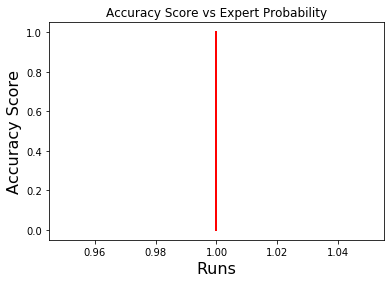

In [491]:
runs = np.arange(1,11)
plt.plot(y_true, predictions, "-", c = "red")
plt.xlabel("Runs", fontsize = 16)
plt.ylabel("Accuracy Score", fontsize = 16)
plt.title("Accuracy Score vs Expert Probability")

In [484]:
y_true.shape

(100,)

### Testing

In [500]:
# Controls 
estimators = 100
population = 100

In [502]:
# Function for predictions
means=[]
rand = np.random.rand()
rand_int = int(rand*100)
for runs in range(100):
    predictors = []
    for est in range(estimators):
        probability = choice(np.arange(51, 52))
        tsizes = threshold_sizes(probability, 15)
        tstart,tend = max_min(tsizes, population, probability)
        tmask = mask_maker(population, tstart, tend)
        predictors.append(tmask)

    preds = []
    # Using the predictors
    for predict in predictors:
        preds.append(predict[rand_int])
    preds = np.array(preds)
    
    # Calculate means 
    means.append(preds.mean())
means = np.array(means)

In [503]:
preds = np.ones((100))
acc = accuracy_score(preds, (means>=0.5).astype(np.int32))

In [504]:
acc # Works fine 

0.86

***Working of the model***
The model assumes that 1 is the acutal answer. Each voter (names as estimator in code) has some probability of voting 1 as the result. This probability is created a psuedo random approach. Each estimator then predicts the result on a random number (if the number lies within its ranges, the estimator predicts one). Now after all the individual votes have voted, the group takes a decision. THe group decision is basically the mean of the scores. If the score is above 0.5, the **group** predicts one. 
The accuracy score is calculated for set of groups with same parametrs and the values are stored. 

In [506]:
# Controls 
estimators = 100
population = 100

In [558]:
# Mask training and predictions
accuracy_scores = []
for runs in range(10):
    group_predictions = [] # The predictions of each group are stored here
    means = [] # The means of the estimators
    rand = np.random.rand() # The number which whose value in range is being tested.
    rand_int = int(rand*100) # Scaled to 100
    for groups in range(100): # 100 groups are being trained
        predictors = []
        for est in range(estimators):# Estimator number
            probability = choice(np.arange(45, 56))
            tsizes = threshold_sizes(probability, 15)
            tstart,tend = max_min(tsizes, population, probability)
            tmask = mask_maker(population, tstart, tend)
            predictors.append(tmask)

        preds = []
        # Using the predictors
        for predict in predictors:
            preds.append(predict[rand_int])
        preds = np.array(preds)
    
        # Group Prediction (using the mean score) 
        group_predictions.append((preds.mean()>=0.50).astype(np.int32))
        means.append(preds.mean())

    # Converting the list into an array
    group_predictions = np.array(group_predictions)
    means = np.array(means)
    
    # Accuracy 
    accuracy_estimator = accuracy(group_predictions)
    accuracy_scores.append(accuracy_estimator)

# Converting the scores into an array
accuracy_scores = np.array(accuracy_scores)

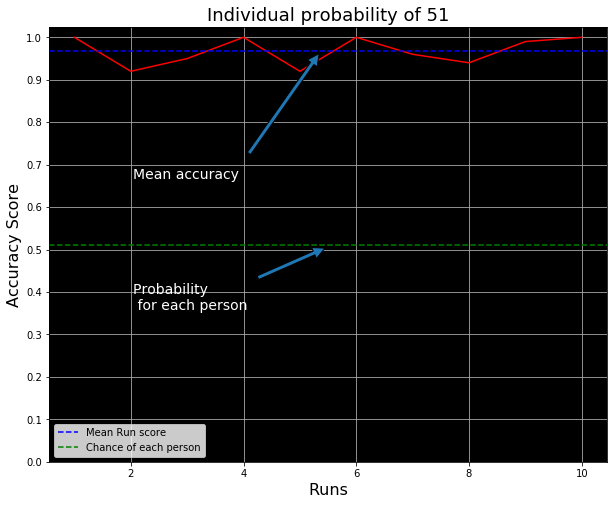

In [757]:
# Plotting the results
runs = np.arange(1, 11)
plt.figure(figsize = (10, 8))
plt.plot(runs, accuracy_scores, c = "red")
plt.xlabel("Runs", fontsize = 16)
plt.ylabel("Accuracy Score", fontsize = 16)
plt.title("Individual probability of 51", fontsize = 18)

# Draw the average
plt.axhline(accuracy_scores.mean(),linestyle = "--", color = "b", label = "Mean Run score")
plt.axhline(0.51, linestyle = "--",color= "green", label = "Chance of each person")
plt.legend()

# Axes
plt.yticks(np.linspace(0, 1, 11))

plt.grid(True)

# Annotation
plt.annotate("Probability \n for each person",xycoords ="axes fraction", xytext = [0.15,0.35], xy = [0.51, 0.5], 
             arrowprops = {"shrink": 0.1}, size = 14, c ="white"
            )

plt.annotate("Mean accuracy",xycoords ="axes fraction", xytext = [0.15,0.65], xy = [0.5, accuracy_scores.mean()], 
             arrowprops = {"shrink": 0.1}, size = 14, c = "white")


ax = plt.gcf().gca()
ax.set_facecolor("black")
plt.savefig("./Images/Probability_51.jpg")
plt.show()

Though each person in the group had just 51 percent of chance to predict the right answer, we can see that the group combined produced a result far greater than the avergae as shown in the graph. 

In [619]:
from sklearn.metrics import accuracy_score

In [620]:
# Accuracy scores at differnt maximun 
maximum = np.arange(52, 66, 4)
scores_ = []
for max_ in maximum:
    accuracy_scores = []
    for runs in range(10):
        group_predictions = [] # The predictions of each group are stored here
        means = [] # The means of the estimators
        rand = np.random.rand() # The number which whose value in range is being tested.
        rand_int = int(rand*100) # Scaled to 100
        for groups in range(100): # 100 groups are being trained
            predictors = []
            for est in range(estimators):# Estimator number
                probability = choice(np.arange(51, max_))
                tsizes = threshold_sizes(probability, 15)
                tstart,tend = max_min(tsizes, population, probability)
                tmask = mask_maker(population, tstart, tend)
                predictors.append(tmask)

            preds = []
            # Using the predictors
            for predict in predictors:
                preds.append(predict[rand_int])
            preds = np.array(preds)
    
            # Group Prediction (using the mean score) 
            group_predictions.append((preds.mean()>=0.50).astype(np.int32))
            means.append(preds.mean())
    
        # Converting the list into an array
        group_predictions = np.array(group_predictions)
        means = np.array(means)
    
        # Accuracy 
        accuracy_estimator = accuracy(group_predictions)
        accuracy_scores.append(accuracy_estimator)

    # Converting the scores into an array
    accuracy_scores = np.array(accuracy_scores)
    # Appending scores
    scores_.append(accuracy_scores)

scores_ = np.array(scores_)

In [621]:
maximum

array([52, 56, 60, 64])

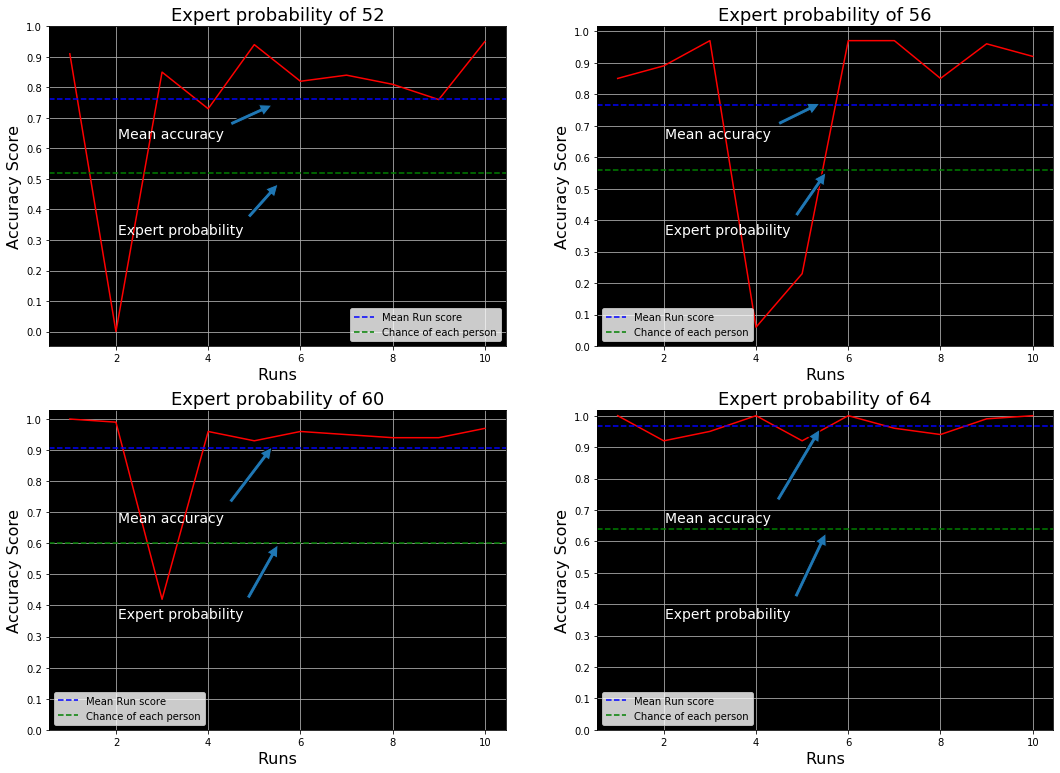

In [758]:
plt.figure(figsize = (18, 20))
for i in range(len(maximum)):
    ax = plt.subplot(3, 2, i+1)
    
    prob = maximum[i]
    accuracy_scores = scores_[i]
    # Plotting the results
    runs = np.arange(1, 11)
    ax.plot(runs, accuracy_scores, c = "red")
    ax.set_xlabel("Runs", fontsize = 16)
    ax.set_ylabel("Accuracy Score", fontsize = 16)
    ax.set_title("Expert probability of "+str(prob), fontsize = 18)

    # Draw the average
    ax.axhline(accuracy_scores.mean(),linestyle = "--", color = "b", label = "Mean Run score")
    ax.axhline(prob/100, linestyle = "--",color= "green", label = "Chance of each person")
    ax.legend()

    # Axes
    ax.set_yticks(np.linspace(0, 1, 11))

    ax.grid(True)

    # Annotation
    ax.annotate("Expert probability",xycoords ="axes fraction", xytext = [0.15,0.35], xy = [0.51, prob/100], 
             arrowprops = {"shrink": 0.1}, size = 14, color = "white"
            )

    ax.annotate("Mean accuracy",xycoords ="axes fraction", xytext = [0.15,0.65], xy = [0.5, accuracy_scores.mean()], 
             arrowprops = {"shrink": 0.1}, size = 14, color = "white")
    
    ax.set_facecolor("black")




plt.savefig("./Images/Different_probabilities.jpg")
plt.show()

In [613]:
scores_[1]

array([0.72, 0.77, 0.01, 0.09, 0.83, 0.76, 0.71, 0.7 , 0.78, 0.88])

In [608]:
len(maximum)

5

In [628]:
scores_.mean(axis = 1)

array([0.761, 0.767, 0.906, 0.968])

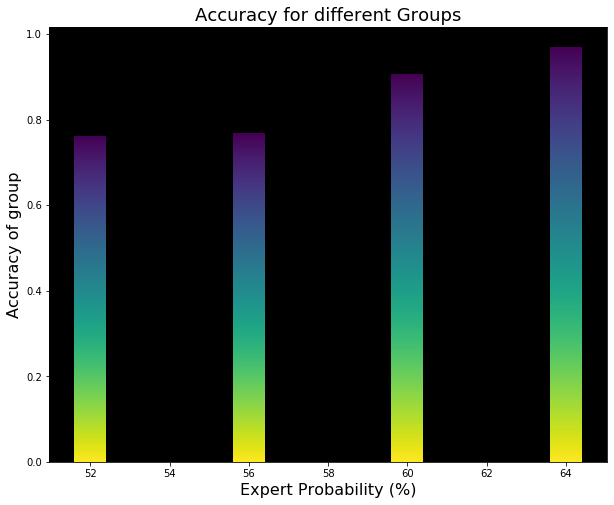

In [750]:
# Other types of visualization 
# Gradient Barplots
fig, ax = plt.subplots(figsize = (10, 8))
data = np.c_[maximum, scores_.mean(axis =1)]
bar = ax.bar(x = data[:, 0], height = data[:,1])

# Gradient 
def gradient_bars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)
ax.set_facecolor("black")
gradient_bars(bar)

# Labeliling the image
ax.set_xlabel("Expert Probability (%)", fontsize = 16)
ax.set_ylabel("Accuracy of group", fontsize = 16)
ax.set_title("Accuracy for different Groups", fontsize = 18)
plt.savefig("./Images/Accuracy_differnt_groups.png")

In [743]:
# Random model with all people with equal probabilities
prob = 51
people = 500
results = []
for i in range(0, people):
    random_number = np.random.rand(i)
    results.append((random_number<=0.51).mean())

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
C:\Users\bella\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [744]:
len(results)

500

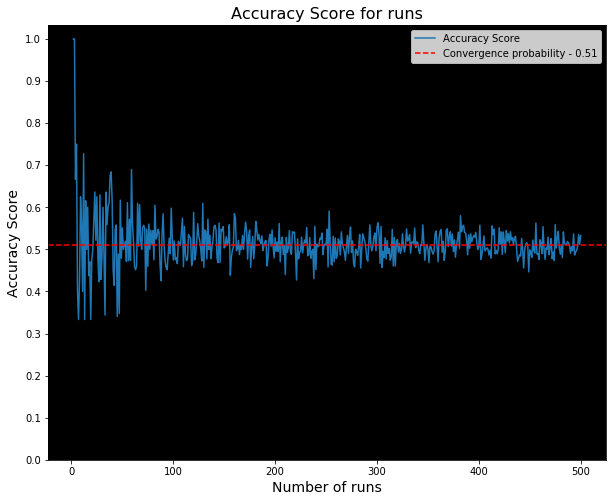

In [749]:
# Plot
runs=np.arange(1, people+1)
# Plot 
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(runs, results, label = "Accuracy Score")

# Labelling
ax.set_xlabel("Number of runs", fontsize = 14)
ax.set_ylabel("Accuracy Score", fontsize = 14)
ax.set_title("Accuracy Score for runs", fontsize = 16)

# Drawing the convergence point
ax.axhline(0.51, linestyle = "--", color = "red", label = "Convergence probability - 0.51")

# Ticks 
ax.set_yticks(np.linspace(0, 1, 11))

# Chaning face color
ax.set_facecolor("black")
plt.legend()
plt.savefig("./Images/Heartbeat.png")

## Specialization visualization

In [759]:
specialized_masks = []
for i in range(2):
    probability = 51
    spec_sizes = threshold_sizes(probability, 15)
    spec_start,spec_end = max_min(spec_sizes, population, probability)
    spec_mask = mask_maker(population, spec_start, spec_end)
    specialized_masks.append(spec_mask)

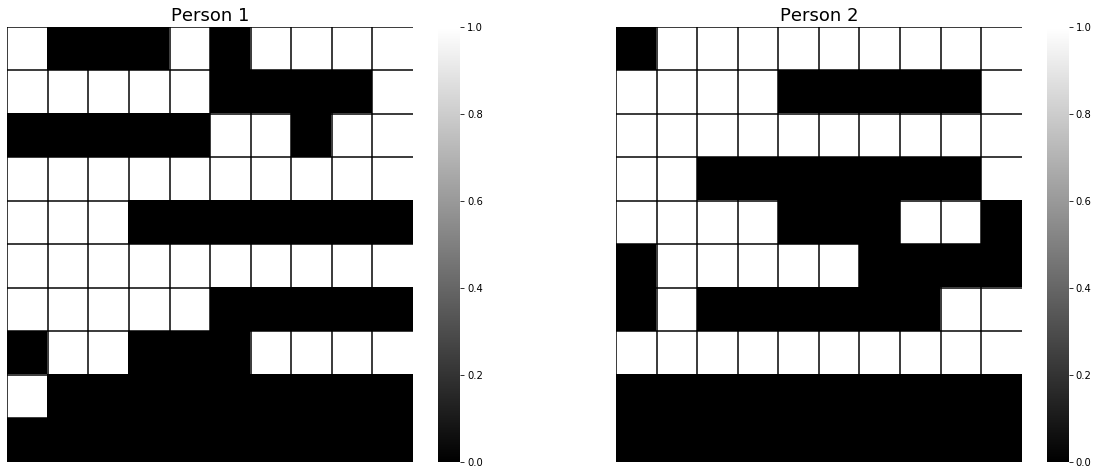

In [802]:
fig= plt.figure(figsize = (20, 8))
for index in range(len(specialized_masks)):
    ax = plt.subplot(1, 2, index+1)
    sns.heatmap(specialized_masks[index].reshape(10, 10), ax = ax, cmap = "gray")
    for i in range(0, 10):
        ax.axhline(i, c = "black")
        ax.axvline(i, c = "black")
    ax.axis("off")
    ax.set_xlabel("Rows", fontsize = 14)
    ax.set_ylabel("Columns", fontsize = 14)
    ax.set_title("Person "+str(index+1), fontsize = 18)

#plt.savefig("./Images/Specialization_heatmap")

### How does group size affect the the proficiency of the group?

In [82]:
random_integer = np.random.randint(0, 100)
random_integer

97

In [8]:
random_integer = np.random.randint(0, 100)
group_predictions = []
for group_size in np.arange(0, 200, 10)[1:]:
    run_preds = []
    for run_number in range(25):
        results = []
        masks_ = []
        
        for i in range(group_size):
            prob = choice(np.full((9), 51))
            sizes = threshold_sizes(prob, 10)
            starts, ends = max_min(sizes,100,prob)
            m = mask_maker(100, starts, ends)
            masks_.append(m)
        
        for predictor in masks_:
            results.append(predictor[random_integer])
    
        results = np.array(results)
        group_pred = (results.mean() >= 0.5).astype(np.int32)
        run_preds.append(group_pred)
        
    run_preds = np.array(run_preds)
    group_accuracy = run_preds.mean()
    
    group_predictions.append(group_accuracy)
    print(group_size, "- Done!")
group_predictions = np.array(group_predictions)

10 - Done!
20 - Done!
30 - Done!
40 - Done!
50 - Done!
60 - Done!
70 - Done!
80 - Done!
90 - Done!
100 - Done!
110 - Done!
120 - Done!
130 - Done!
140 - Done!
150 - Done!
160 - Done!
170 - Done!
180 - Done!
190 - Done!


In [9]:
group_predictions

array([0.6 , 0.52, 0.68, 0.64, 0.8 , 0.8 , 0.68, 0.72, 0.68, 0.8 , 0.64,
       0.76, 0.84, 0.76, 0.68, 0.8 , 0.84, 0.64, 0.64])

In [25]:
np.arange(0, 100, 100)[1:]

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

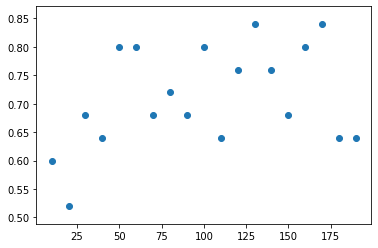

In [10]:
# Visualization 
plt.scatter(np.arange(0, 200, 10)[1:], group_predictions)


In [33]:
np.full((9), 51)

array([51, 51, 51, 51, 51, 51, 51, 51, 51])

### How many people did it take to achieve an accuracy above 90%?

In [5]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = 0
ideal_group_size = 1
random_integer = np.random.randint(0, 100)
while acc <=0.9:
    p_ = []
    for i in range(50):
        results = []
        masks_ = []
        
        for i in range(ideal_group_size):
            prob = choice(np.full((9), 51))
            sizes = threshold_sizes(prob, 10)
            starts, ends = max_min(sizes,100,prob)
            m = mask_maker(100, starts, ends)
            masks_.append(m)
        
        for predictor in masks_:
            results.append(predictor[random_integer])
    
        results = np.array(results)
        group_pred = (results.mean() >= 0.5).astype(np.int32)
        p_.append(group_pred)
    p_ = np.array(p_)
    acc = accuracy(p_)
    ideal_group_size += 1

In [ ]:
ideal_group_size

### Consider one particular group

In [11]:
# Controls 
groupsize = 100
expertprob = 5

In [143]:
# Creating the probability array
array = np.append(np.full((19), 51), 70)
array = np.random.permutation(array)


In [149]:
# Creating a group 
results = []
masks = []
probs = []
for person in range(groupsize):
    prob = choice(array)
    probs.append(prob)
    sizes = threshold_sizes(prob, 10)
    starts, ends = max_min(sizes,100,prob)
    m = mask_maker(100, starts, ends)
    masks.append(m)
probs = np.array(probs)

In [150]:
probs

array([51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
       70, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 70, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51])

In [151]:
elements, counts = np.unique(probs, return_counts = True)
counts

array([98,  2], dtype=int64)

In [520]:
elements

array([0, 1], dtype=int8)

In [176]:
# Examining the group
# Waffle chart for this group
def waffle_creation(categories, values, height = 10, width = 40, signs = "", cmap_name = "coolwarm"):
    
    # Propotions of each category
    total = values.sum(axis = 0)
    proportions = (values/total)
    
    # Categories array
    categories_array = np.arange(1, len(np.unique(categories))+1)
    
    # Number of tiles
    tiles = height*width
    tiles_per_cat = round(proportions*tiles)
    
    # Sum 
    SUM = tiles_per_cat.sum()
    if SUM>tiles:
        diff = SUM-tiles
        for i in range(int(diff)):
            copy = np.sort(tiles_per_cat.copy())
            copy[i] -= 1
        tiles_per_cat = copy.copy()[::-1]
    
    #  Matrix 
    matrix = np.zeros(tiles)
    
    
    # Cummulative sums 
    cummulative = np.cumsum(tiles_per_cat).astype(np.int32)
    initial = 0
    for index, cum_index in enumerate(cummulative):
        matrix[initial:cum_index] = categories_array[index]
        initial = cum_index
    
    matrix = matrix.reshape(width, height).T
    
    # Labels
    import matplotlib.patches as mpatches    
    colormap = mpl.cm.get_cmap(cmap_name)
    color_values = np.append(cummulative, 0)[-1::-1]
    
    labels_handles = []
    for i in range(len(categories)):
        col_val = colormap(color_values[i]/tiles)
        label_ = categories[i]+" ("+str(int(tiles_per_cat[i]))+ signs + ")"
        labels_handles.append(mpatches.Patch(color = col_val, label = label_))
    
    # Plotting the figure
    # Showing the matrix 
    plt.figure()
    plt.matshow(matrix, cmap = colormap)
    
    # Ticks
    ax = plt.gcf().gca()
    ax.set_yticks(np.arange(-0.5, height, 1), minor = True)
    ax.set_xticks(np.arange(-0.5, width, 1), minor = True)
    ax.grid(which = "minor", color = "white", linestyle = "-", linewidth = 1)
    
    # Legends
    plt.legend(handles = labels_handles, loc = "lower center", 
              bbox_to_anchor = (0, -0.3, 0.95, 1))
    
    plt.show()

<Figure size 432x288 with 0 Axes>

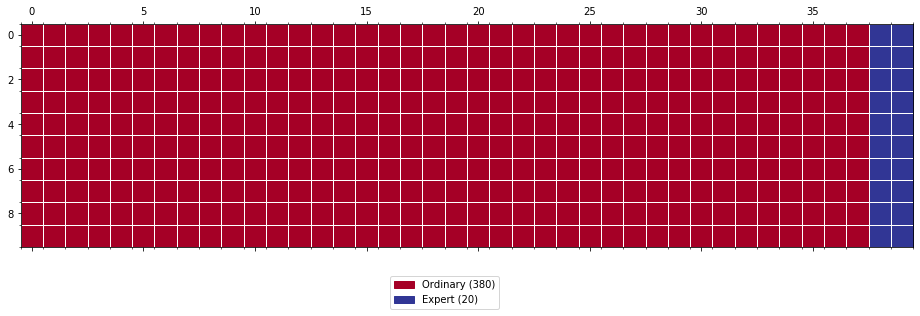

In [230]:
waffle_creation(np.array(["Ordinary", "Expert"]),vals, cmap_name = "RdYlBu")

In [70]:
vals = pd.Series(np.array([95, 5]))

In [67]:
(vals/vals.sum(axis = 0))

array([0.95, 0.05])

In [76]:
vals

0    95
1     5
dtype: int32

## Different Group Architectures
The aim of the project is to consider different architectures of group and gain insights on how the groups are able to perform better

### Mixed group
This group predominantly consists of ordinary people with a small number of experts

In [304]:
# Controls 
# Ordinary 0, Expert 1
groupsize = 1000
expert_per = 5
no_experts = round(groupsize*(expert_per/100))
people = np.zeros(groupsize, dtype = np.int8)
people[-no_experts:] = 1

In [305]:
# Proficiencies
expert = 75
ordinary = 50
group = np.where(people == 0, ordinary, expert)

In [306]:
# Counts
elements, counts = np.unique(people,return_counts = True)

<Figure size 432x288 with 0 Axes>

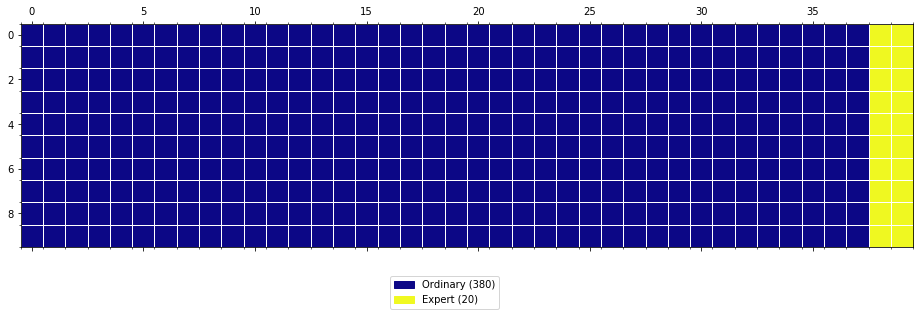

In [307]:
# Waffle chart
ax = waffle_creation(["Ordinary", "Expert"], pd.Series(counts), cmap_name = "plasma" )


In [308]:
# People creation 
results = []
masks = []
for prob in group:
    sizes = threshold_sizes(prob, 10)
    starts, ends = max_min(sizes,100,prob)
    m = mask_maker(100, starts, ends)
    masks.append(m)

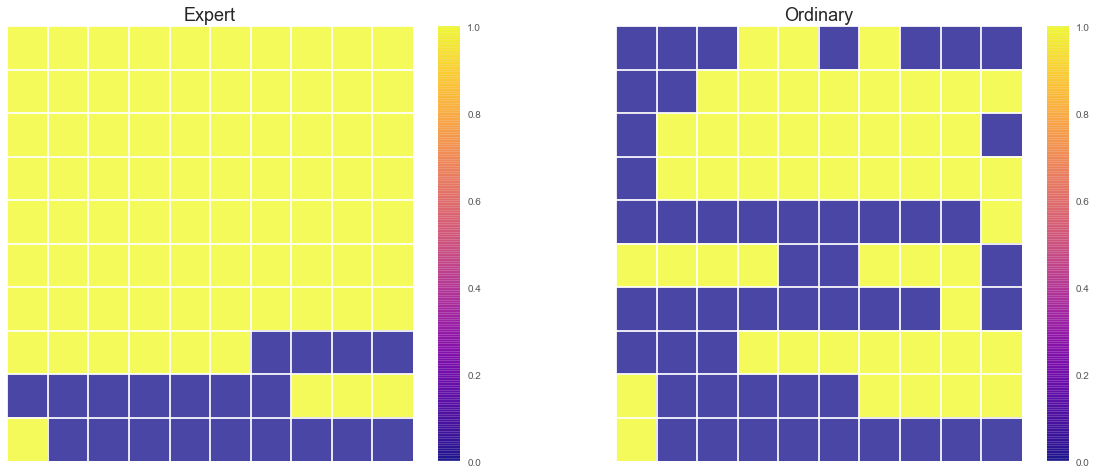

In [497]:
# A Expert Heat map vs an ordinary person heat map
titles = ["Expert","Ordinary"]
specializedmasks = [masks[-1], masks[0]]
plt.figure(figsize = (20, 8))
for index in range(2):
    ax = plt.subplot(1, 2, index+1)
    plotmask = specializedmasks[index]
    sns.heatmap(plotmask.reshape(10, 10), ax = ax, cmap = "plasma", alpha = 0.75)
    for i in range(0, 10):
        ax.axhline(i, c = "white")
        ax.axvline(i, c = "white")
    ax.axis("off")
    ax.set_xlabel("Rows", fontsize = 14)
    ax.set_ylabel("Columns", fontsize = 14)
    ax.set_title(titles[index], fontsize = 18)

In [310]:
# Predictions of the group 
# Average probability 
average_proficiency = group.mean()

In [311]:
# Predictions 
# New prediction mechanism where the masks remain same but the box number changes

group_preds = []
for testnumber in range(1000):
    preds = []
    for predictor in masks:
        boxnumber = np.random.randint(0, 100)
        preds.append(predictor[boxnumber].astype(np.int32))
    preds = np.array(preds)
    group_preds.append((preds.mean()>=0.50).astype(np.int32))
group_preds = np.array(group_preds)

In [312]:
group_preds.mean(), average_proficiency

(0.817, 51.25)

In [350]:
# New prediction methodology
# Box numbers change but the masks remain same
runs = 10000
er = np.random.randint(0, 100, runs)
ps = []
for predictor in masks:
    maskp = predictor[er].astype(np.int8)
    ps.append(maskp)
ps = np.array(ps)
accuracy = (ps.mean(axis =0)>=0.50).mean()
print(accuracy)

0.8706


In [364]:
def people_simulation(population, expertprof = 70, ordinaryprof = 50 ,expertprob = 5):
    group = np.zeros(population)
    noexperts = round((5/100)*population)
    group[-noexperts:] = 1
    
    # Probabilities
    group_probs = np.where(group==0,ordinaryprof, expertprof)
    
    masksarray = []
    for probability in group_probs:
        sizes = threshold_sizes(probability, 10)
        starts, ends = max_min(sizes,100,prob)
        m = mask_maker(100, starts, ends)
        masksarray.append(m)
    
    return np.array(masksarray)
    

In [365]:
def predictor(masks_array, runs = 100):
    boxes = np.random.randint(0, 100, runs)
    allps = []
    for predictor in masks_array:
        maskpreds = predictor[boxes].astype(np.int8)
        allps.append(maskpreds)
    allps = np.array(allps)
    accuracy = (allps.mean(axis =0)>=0.50).mean()
    return accuracy

In [383]:
groupsize = 100
masks = people_simulation(groupsize)
acc = predictor(masks,1000)
print(acc)

0.763


In [392]:
# Group size vs. Maximum Probability
# Different group sizes 
accuracies = []
for size in range(10, 1000, 5):
    masks = people_simulation(size)
    acc = predictor(masks, 1000)     
    accuracies.append(acc)


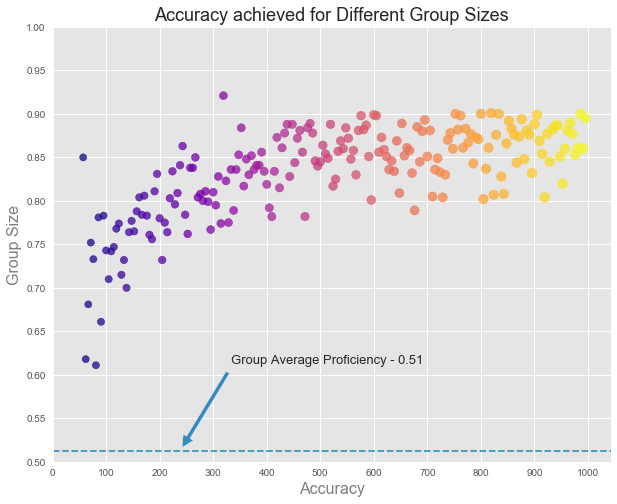

In [519]:
# PLot the results
mpl.style.use("ggplot")
plt.figure(figsize = (10, 8))
plt.scatter(np.arange(10,1000, 5), accuracies, c = np.arange(10, 1000, 5), cmap = "plasma", 
           s = 50+50*(np.arange(10, 1000, 5)/1000), alpha = 0.75)
plt.yticks(np.round(np.linspace(0.5, 1.0, 11), 2))
plt.xticks(np.round(np.linspace(-50, 1000, 11), 1),np.arange(0, 1001, 100))

# Title
plt.title("Accuracy achieved for Different Group Sizes", fontsize = 18)
plt.xlabel("Accuracy", fontsize = 16, color = "gray")
plt.ylabel("Group Size", fontsize = 16, color = "gray")

# Vertical Line 
plt.axhline(average_proficiency/100, linestyle = "--", color = mpl.cm.get_cmap("ocean")(8/11))

# Annotation 
plt.annotate("Group Average Proficiency - "+str(round(average_proficiency/100, 2)), xy = [200,average_proficiency/100], xytext = [300,(average_proficiency/100)+0.1],
            textcoords = "data", arrowprops = {"shrink":0.04}, size = 13)
plt.show()

In [526]:
# A group without Specialization 
answers = []
for i in range(100):
    answers.append(voting(50, 55).mean())
answers  = np.array(answers)

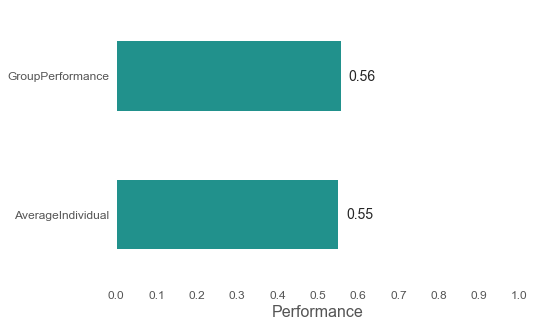

In [542]:
info2 = pd.Series([answers.mean(), 0.55], ["GroupPerformance", "AverageIndividual"])
ax = info2.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4), fontsize = 12)
ax.invert_yaxis()
for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 14)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel("Performance", fontsize = 16)
ax = plt.gcf().gca()
ax.set_position([0.25,0.15, 0.7, 0.7])
ax.set_facecolor("white")
plt.savefig('./SimulationPictures2'+"/"+"UniformGroup.jpg")